In [1]:
# Setup Environment
import gym
from typing import List, Set, Dict, Tuple, Optional
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from IPython.display import HTML
# Setup Environment
import sys
import os
ROOT = '../../'
sys.path.append(ROOT)


from source.utils import *
from source.agents.policy_iteration_agent import PolicyIterationAgent
from source.agents.value_iteration_agent import ValueIterationAgent


test_policy_evaluation passed
test_policy_improvement passed
test_policy_iteration passed
test_value_iteration passed


policy evaluation 

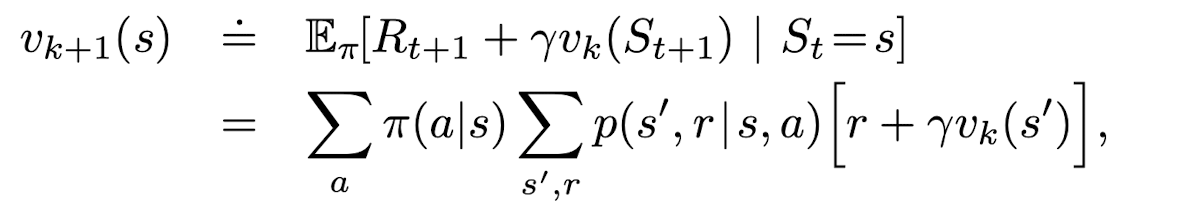

Policy Improvement

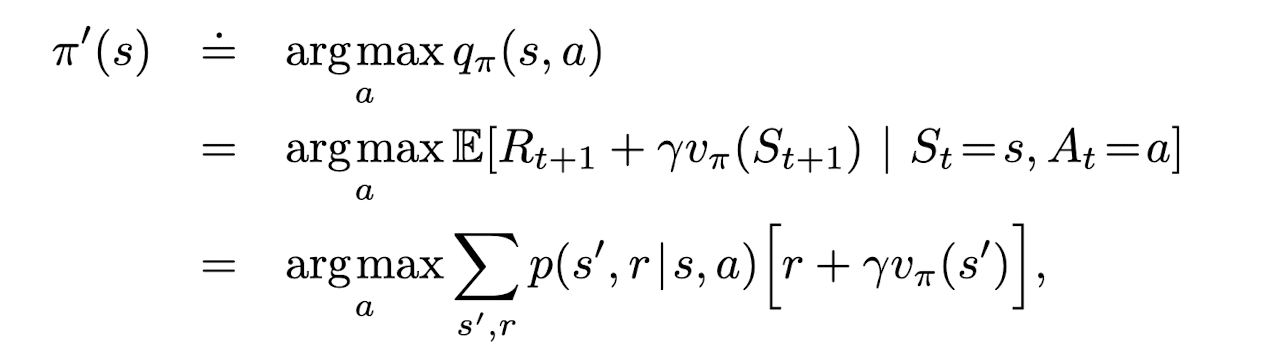

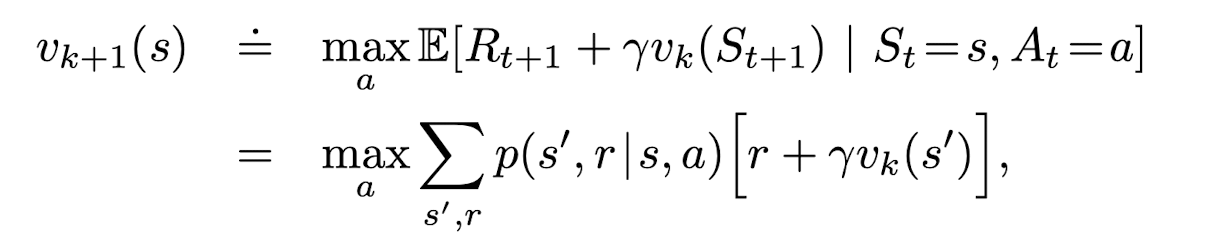

In [2]:
# Create Environment, learn optimal policy and play the game.
# Supported environments:
#  - Taxi-v3: gym.make('Taxi-v3')
#  - CliffWalking-v0: gym.make('CliffWalking-v0')
#  - FrozenLake-v1: gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True)
video_path = os.path.join(ROOT, "video/dp.mp4")
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True, render_mode='rgb_array') #gym.make('CliffWalking-v0')

agent_type = 'value'
# Create Agent: 
if agent_type == 'policy':
  # Option 1: policy iteration
  agent = PolicyIterationAgent(
    state_space=env.observation_space, 
    action_space=env.action_space, 
    discount_rate=0.9
  )
  # Learn optimal policy
  agent.policy_iteration(env.P)
if agent_type == 'value':
  # Option 2: value iteration
  agent = ValueIterationAgent(
    state_space=env.observation_space, 
    action_space=env.action_space, 
    discount_rate=0.95
  )
  # Learn optimal policy
  agent.value_iteration(env.P, 1e-9)

success_rate = estimate_success_rate(agent, env, 10000)
print(f"Success rate = {success_rate}")


# Play the game!
_, _ = agent.play_episode(env, learning=False, video_path=video_path)

HTML(render_mp4(video_path))

100%|██████████| 10000/10000 [00:12<00:00, 813.75it/s]


Success rate = 0.7434
Moviepy - Building video ../video/dp.mp4.
Moviepy - Writing video ../video/dp.mp4



Moviepy - Done !
Moviepy - video ready ../video/dp.mp4


Text(0.5, 1.0, 'state_values')

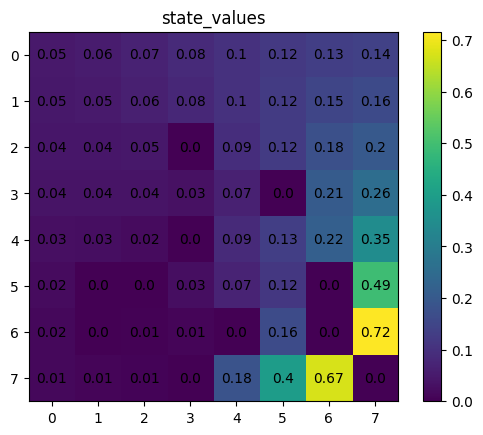

In [3]:
# Plot the action values.
# cliff walking
#shape = (4,12,4)
# frozen lake
shape = (8,8,4)
#shape = (4,4,4)

plt.figure(0)
grid = agent._state_values.reshape(shape[:2])
plt.imshow(grid)
for (j,i),label in np.ndenumerate(grid):
    plt.text(i,j,round(label, 2), ha='center',va='center')
plt.colorbar(orientation='vertical')
plt.title("state_values")


# Summary

## Dynamic Programing

The most distinct things about DP is that:
1. the algorithm doesn't learn on the fly (i.e. while playing the game)! It learns the optimal policy and state values first, then play the game.
2. the algorithm requires **complete and accurate model of the environment**! As shown in the code above, it requires accessing the matrix env.P. For actual RL task, this is usually not possible because the environment is complicated and opaque.  

### Policy Iteration 

while (action not stable):
 - run policy evlaution until converge
   - this step iteratively find state value V(s) according to new policy V(s,a)
 - run policy improvement and check if action is stable
   - this step greedily update policy(action value) V(s, a) according to new state value
- check if actions are stable

### Value iteration
Simliar to policy iteration but with only one pass in policy evaluation. The result algorithm can be rewritten so that the policy improvement is implicit, resulting in a algorithm that only find the optimal state values, and not having the explicit optimal policy. 

During action, the optimal action needs to be found by evaluting the policy improvement on the current step. 

while (action not stable):
 - run value iteration  
   - this step iteratively update state value V_k+1(s) by the max state values found using state values from last step V_k(s)
- check if actions are stable 

NOTE:
discounting factor is necessary for learning the policy IF the environment only has reward at the end of episode. Otherwise the agent assign equal value for each state that leads to the reward.

